In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow import keras


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('PruebaTG_v2.xlsx')

In [4]:

df = df.drop(0)
df = df.reset_index(drop= True)

In [5]:
dups = df.pivot_table(index = ['Diagnosis'], aggfunc ='size') 
  
print(dups)  

Diagnosis
diabetes       668
healthy        441
intolerance    865
dtype: int64


In [6]:
#sano 0, intolerate a la glucosa = 1, prediabetes 2, diabetes = 3

df['Diagnosis'] = df['Diagnosis'].replace({'healthy' : 0}, regex=True)

In [7]:
df['Diagnosis'] = df['Diagnosis'].replace({'prediabetes' : 2}, regex=True)

In [8]:
df['Diagnosis'] = df['Diagnosis'].replace({'intolerance' : 1}, regex=True)


In [9]:
df['Diagnosis'] = df['Diagnosis'].replace({'diabetes' : 2}, regex=True)


In [10]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size = 0.30, random_state = 100)

print("Examples used for training: ", len(train))
print("Examples used for test: ", len(test))

Examples used for training:  1381
Examples used for test:  593


In [11]:
#patients = df.drop(["Paciente","Edad","Diagnostico","Basal"], axis=1)
patients = df.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_train = train.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_test = test.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
#patients = patients.drop(0)
p_train.head(5)



,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303
545,70.013398,70.099281,70.310719,70.683925,71.242275,71.998571,72.959478,74.124148,75.486303,77.039402,...,113.144839,112.855551,112.568042,112.282307,111.998337,111.716125,111.435664,111.156945,110.879959,110.604700
1286,99.326902,98.643168,98.049814,97.567919,97.213219,96.996921,96.926422,97.005887,97.236775,97.618391,...,132.713109,132.452772,132.194010,131.936818,131.681190,131.427120,131.174602,130.923631,130.674201,130.426308
438,69.569336,69.162807,68.856940,68.668936,68.607480,68.675065,68.869861,69.186851,69.619011,70.158178,...,91.607970,91.476853,91.346337,91.216420,91.087100,90.958376,90.830246,90.702707,90.575758,90.449397
1202,100.001976,100.014997,100.048060,100.108305,100.201347,100.331566,100.502297,100.716048,100.974581,101.279121,...,137.890610,137.620184,137.351102,137.083366,136.816978,136.551939,136.288252,136.025917,135.764937,135.505311
949,88.904965,87.942021,87.276298,86.898256,86.781386,86.895307,87.210217,87.700239,88.342159,89.116041,...,148.575320,148.236815,147.899187,147.562490,147.226851,146.892187,146.558443,146.225671,145.893947,145.563210


<hr>

In [12]:
s = patients.shape
s[1]
x = [i for i in range(0,s[1],30)]
x


[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [13]:
a = [patients.iloc[:,i] for i in range(0,s[1],30)]
x_test = [p_test.iloc[:,i] for i in range(0,s[1],30)]
x_train = [p_train.iloc[:,i] for i in range(0,s[1],30)]
a = np.array(a).T
x_train = np.array(x_train).T
x_test = np.array(x_test).T

x_test.shape


(593, 10)

In [14]:
labels = df[['Diagnosis']]
labels_train = train[['Diagnosis']]
labels_test = test[['Diagnosis']]
#labels = labels.drop(0)
labels_train.head(20)

,Diagnosis
545,1
1286,2
438,0
1202,1
949,1
533,1
1293,1
64,1
202,2
480,2


<hr>

In [15]:
import matplotlib.pyplot as plt

In [16]:
import numpy as np
#a = np.zeros((len(labels), 300))

In [17]:
y_train = labels_train.to_numpy()
y_test = labels_test.to_numpy()

In [18]:
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [19]:
y_train[0:11,:]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [20]:
a
l = labels.to_numpy()


In [21]:
a.shape

(1974, 10)

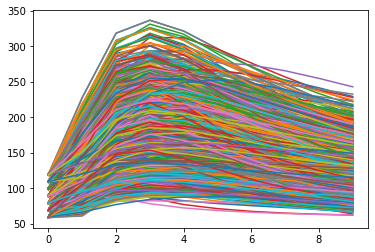

In [22]:
for i in range(0, len(y_train)):
  plt.plot(x_train[i,:])
plt.show()

In [23]:
#a = a.reshape(a.shape[0], 10, 1)
l=labels.to_numpy()
#l = l.reshape(a.shape[0], 3, 1)
numClases = len(np.unique(l))
len(np.unique(l))

3

In [24]:
x

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [25]:

a.shape

(1974, 10)

#Normalize

In [26]:
from tensorflow import keras

a = a.astype('float32')
#x_test = x_test.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
a /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_train.shape, 'l')

x_train shape: (1381, 10)
1381 train samples
593 test samples
(1381, 3) l




##MLP

In [27]:
from tensorflow.keras import layers
from tensorflow.keras import activations
import keras as tf

In [28]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
 
# cargamos las 4 combinaciones de las compuertas XOR
training_data = x_train
 
# y estos son los resultados que se obtienen, en el mismo orden
l = labels.to_numpy()
target_data = y_train
 

In [29]:
training_data.shape

(1381, 10)

In [30]:

model = Sequential()
#model.add(Dense(16, input_dim=300, activation='relu')) #todos los datos
model.add(Dense(16, input_dim=10, activation='relu')) #10 datos
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(numClases, activation= 'sigmoid'))

 
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
 
model.fit(training_data, target_data, epochs=1000)
 
# evaluamos el modelo
scores = model.evaluate(training_data, target_data)
 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
predict = model.predict(training_data).round()
print (predict)

Epoch 1/1000
44/44 [==============================] - 1s 2ms/step - loss: 0.2180 - accuracy: 0.4019
Epoch 2/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.4272
Epoch 3/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.4272
Epoch 4/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.4272
Epoch 5/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.4323
Epoch 6/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.4395
Epoch 7/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.4272
Epoch 8/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.5148
Epoch 9/1000
44/44 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.5199
Epoch 10/1000
44/44 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.5141

In [31]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
predict = model.predict(x_test)
print (predict.round())


accuracy: 83.64%
19/19 [==============================] - 0s 955us/step
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [32]:
p = predict[:]

In [33]:
p[0:3:]

array([[9.0216314e-03, 9.8630166e-01, 3.1763087e-03],
       [7.9449552e-01, 2.0347692e-01, 1.3215660e-07],
       [9.6426725e-01, 3.7010748e-02, 5.9620213e-08]], dtype=float32)

In [34]:
print(p[0:3:].round(),y_test[0:3,:])
print(p[0,:].round()==y_test[0,:])


[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[ True  True  True]


In [35]:
scores = model.evaluate(x_test, y_test)

19/19 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.8297


In [36]:
scores

[0.09074544906616211, 0.8296796083450317]


#Assessment

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score



In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(p, axis=-1)
y_true=np.argmax(y_test, axis=-1)

In [40]:
# Compute ROC curve and ROC area for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

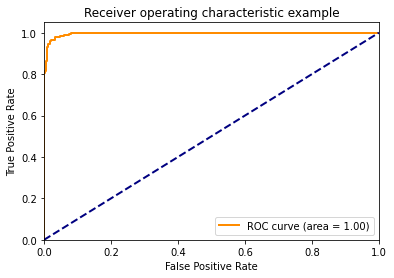

In [41]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

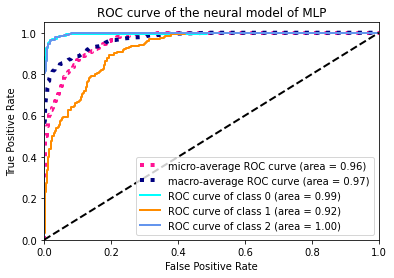

In [56]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(0,n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of the neural model of MLP")
plt.legend(loc="lower right")
plt.show()


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(p, axis=-1)
y_true=np.argmax(y_test, axis=-1)



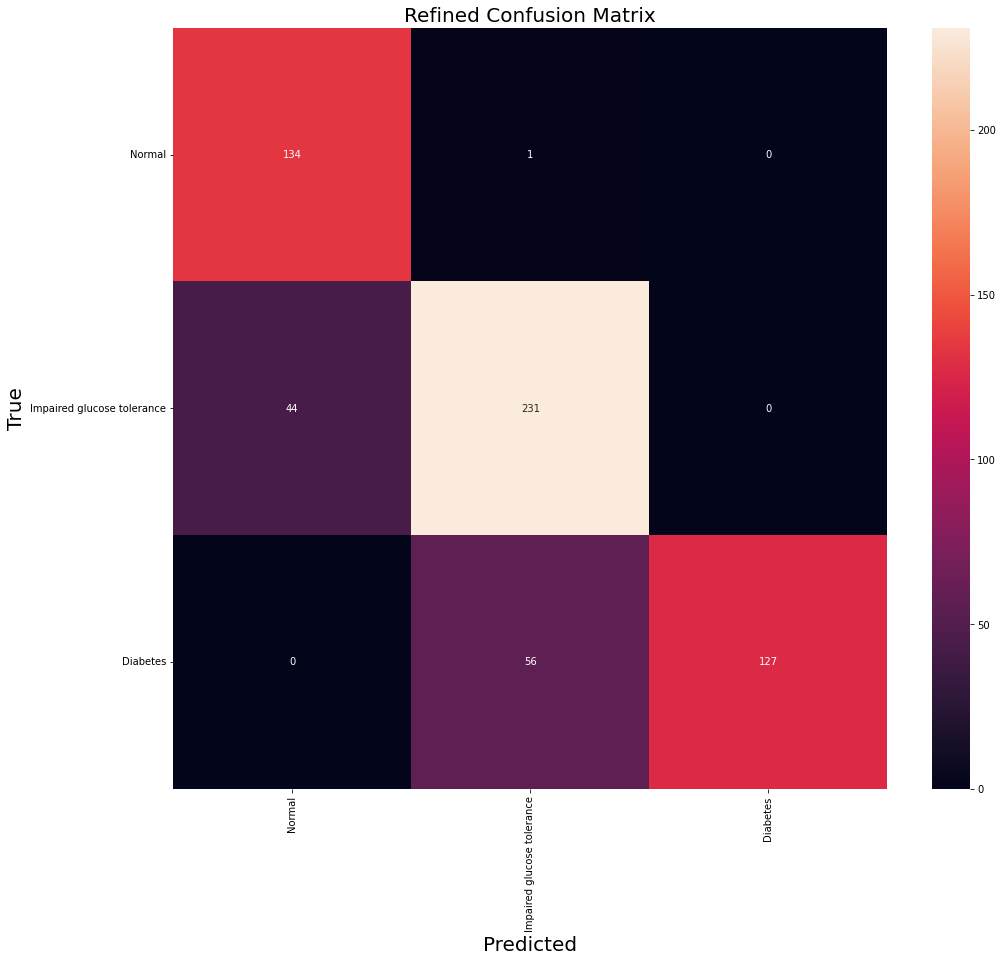

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
#labels = le.classes_
class_names = ['Normal','Impaired glucose tolerance','Diabetes']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [45]:
cm

array([[134,   1,   0],
       [ 44, 231,   0],
       [  0,  56, 127]])

In [46]:
# Accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_true, y_pred )
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average=None)

In [47]:
# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(y_true, y_pred, average=None)

In [48]:
print(ac,recall,precision,f1)

0.8296795952782462 [0.99259259 0.84       0.69398907] [0.75280899 0.80208333 1.        ] [0.85623003 0.82060391 0.81935484]


#Test with real data

##healthy 0, glucose intolerance = 1, diabetes = 2

In [49]:
import numpy as np
patient_test = np.array(([ 82., 155.,  141. , 103. ,  96. ,  89. ,  89. , 89. ,  89., 89. ],
                         [ 82.,   118.,  140. , 148., 147.,  146.,  146.,  146.,  146., 146. ],
                         [ 92. , 133.,  72. , 87., 92.,  92. , 92., 92., 92., 92.],
                         [ 157. , 185.,  232. , 216., 197.,  192. , 192., 192., 192., 192.],
                         [ 70, 70, 148, 148, 116, 97, 97, 97, 97, 97 ] ,
                         [ 79, 79, 157, 157, 116, 84, 84, 84, 84, 84 ],
                         [ 82, 82, 94, 94, 102, 102, 102, 102, 102, 102 ] ,
                         [ 95, 95, 180, 180, 155, 155, 140, 140, 140, 140 ],
                         [ 84, 84, 84, 84, 164, 164, 164, 164, 164, 164 ],
                         [ 73, 73, 99, 99, 82, 82, 82, 82, 82, 82 ] , 
                         [ 61, 61, 94, 94, 90, 90, 90, 90, 90, 90 ],
                         [ 100, 100, 100, 100, 149, 149, 149, 149, 149, 149 ],
                         [ 63, 63, 63, 63, 87, 87, 87, 87, 87, 87 ] ,
                         [ 75, 75, 75, 75, 91, 91, 91, 91, 91, 91 ], 
                         [ 117, 117, 145, 145, 98, 98, 98, 98, 98, 98 ],
                         [ 120, 120, 120, 120, 136, 136, 136,136, 136, 136 ]
                         ))
patient_test.shape

(16, 10)

In [50]:
predict = model.predict(patient_test)
print (predict)

1/1 [==============================] - 0s 16ms/step
[[9.9446702e-01 5.1023741e-03 2.7576405e-08]
 [9.4249350e-01 5.9100725e-02 7.3277491e-08]
 [5.6723368e-01 4.2554072e-01 2.0461881e-07]
 [2.2043568e-07 5.4648884e-02 9.4349563e-01]
 [3.1464688e-02 9.6711183e-01 7.9853729e-05]
 [1.3663390e-01 8.6864954e-01 1.0097123e-06]
 [9.9373418e-01 5.9143146e-03 2.8885827e-08]
 [3.5966605e-02 9.6293628e-01 5.0740047e-05]
 [9.9042809e-01 9.5253093e-03 3.4190485e-08]
 [9.9439514e-01 5.1823598e-03 2.7706522e-08]
 [9.9441475e-01 5.1605701e-03 2.7671085e-08]
 [9.8198676e-01 1.8560823e-02 4.4512408e-08]
 [9.9434692e-01 5.2360068e-03 2.7793590e-08]
 [9.9414784e-01 5.4568723e-03 2.8151588e-08]
 [9.4846624e-01 5.3091470e-02 6.9854686e-08]
 [3.9186012e-02 9.5994252e-01 3.7945592e-05]]


In [51]:
y_pred = np.argmax(predict, axis=-1)
y_pred 

array([0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [52]:
label = [0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]

In [53]:

# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(label, y_pred, average=None)

In [54]:
print(ac,recall,precision,f1)

0.8296795952782462 [0.99259259 0.84       0.69398907] [0.75280899 0.80208333 1.        ] [0.7 0.4 1. ]


In [ ]:
Mlp